Librerías

In [85]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Se define el df a utilizar.

In [86]:
df_hechos=pd.read_excel('DATA/Iniciales/homicidios.xlsx',sheet_name='HECHOS')
df_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


Se explora el contenido del DtataFrame.

In [87]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Se verifica la presencia de registros duplicados.

In [88]:
df_hechos.duplicated().sum()

0

Se eliminan las columnas que no vamos a utilizar para nuestro análisis.

In [89]:
columnas_eliminar=['FECHA','DD','HORA','LUGAR_DEL_HECHO','Calle','Altura','Cruce','Dirección Normalizada','XY (CABA)','pos x','pos y','PARTICIPANTES']
df_hechos.drop(columns=columnas_eliminar, inplace=True)
df_hechos.head(3)

,ID,N_VICTIMAS,AAAA,MM,HH,TIPO_DE_CALLE,COMUNA,VICTIMA,ACUSADO
0,2016-0001,1,2016,1,4,AVENIDA,8,MOTO,AUTO
1,2016-0002,1,2016,1,1,GRAL PAZ,9,AUTO,PASAJEROS
2,2016-0003,1,2016,1,7,AVENIDA,1,MOTO,AUTO


Como 'HH' era de tipo object, se lo convierte a numérico. Como existen campos con las siglas SD, se convierten a nulas.

In [90]:
df_hechos['HH'] = pd.to_numeric(df_hechos['HH'], errors='coerce')

Se verivica que se haya efecuado el cambio de 'HH'.

In [91]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             696 non-null    object 
 1   N_VICTIMAS     696 non-null    int64  
 2   AAAA           696 non-null    int64  
 3   MM             696 non-null    int64  
 4   HH             695 non-null    float64
 5   TIPO_DE_CALLE  696 non-null    object 
 6   COMUNA         696 non-null    int64  
 7   VICTIMA        696 non-null    object 
 8   ACUSADO        696 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 49.1+ KB


### Análisis univariado

Se ve que datos cobntiene la columna 'N_VICTIMAS'.

In [92]:
df_hechos['N_VICTIMAS'].unique()

array([1, 2, 3], dtype=int64)

Se busca saber cuales son los valores mas recurrentes.

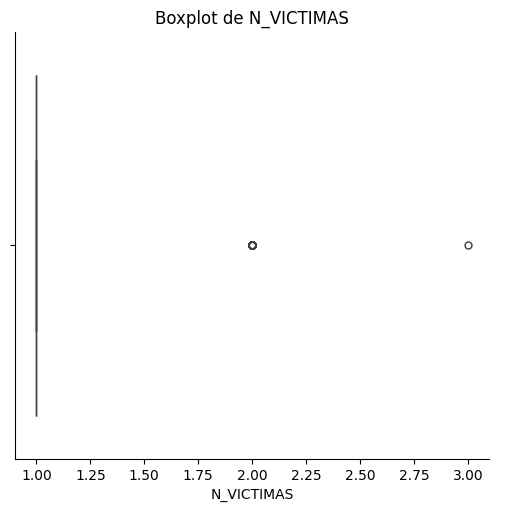

In [93]:

sns.catplot(x=df_hechos['N_VICTIMAS'], kind='box')
# Añade etiquetas y título
plt.xlabel('N_VICTIMAS')
plt.title('Boxplot de N_VICTIMAS')
# Muestra el boxplot
plt.show()

Como se visualiza en el gráfico de cajas, la mayoría de los accidentes tienen una sola víctima. El 2 y 3 son outliers, por eso en 1 queda practicamente una línea.

Se busca cuales son exactamente los valores de 1 victima, 2 y 3 para comprobarlo.

In [94]:
print(df_hechos['N_VICTIMAS'].value_counts())

N_VICTIMAS
1    676
2     19
3      1
Name: count, dtype: int64


Aunque el 2 tenga un poco mas de datos que el 3 (uno solo) se considera outliers igual, como muestra el gráfico de cajas. Igualmente el 2 es un punto mas marcado que el 3.

Se ve que datos cobntiene la columna 'AAAA'.

In [95]:
df_hechos['AAAA'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

Se realiza un gráfico de barras para saber la frecuencia del número de homicidios por año. Y asi saber que año tuvo mas homicidios.

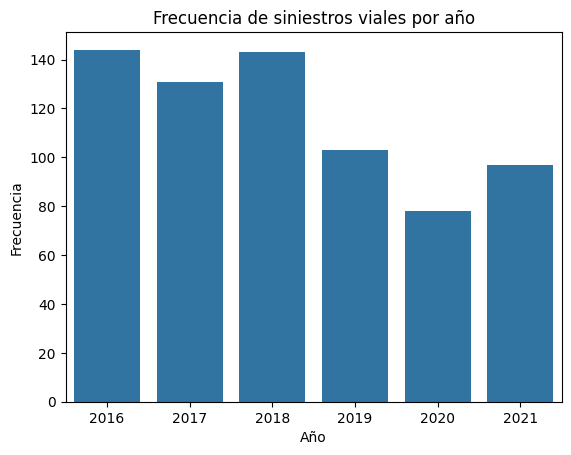

In [96]:
sns.barplot(x=df_hechos['AAAA'].value_counts().index, y=df_hechos['AAAA'].value_counts())
plt.title('Frecuencia de siniestros viales por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
# Mostrar el lienzo con los gráficos
plt.show()

Los años con más homcidios fueron el 2016 y 2018.

Se ve que datos cobntiene la columna 'MM'.

In [97]:
df_hechos['MM'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Se realiza un gráfico de barras para saber la cantidad de homicidios por mes, si hay algún mes que hay mas homicidios y si hay uno con menos para pensar los motivos y posibles soluciones futuras.

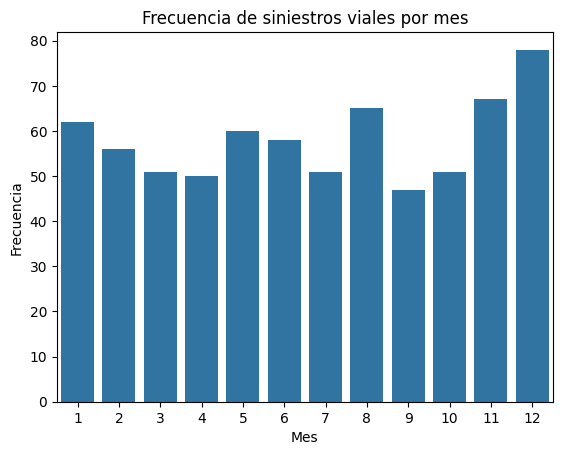

In [98]:
sns.barplot(x=df_hechos['MM'].value_counts().index, y=df_hechos['MM'].value_counts())
plt.title('Frecuencia de siniestros viales por mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
# Mostrar el lienzo con los gráficos
plt.show()

Se ve que la mayor cantidad de homicidios se efectuan cerca de la fecha de fin de año, ya sea unos meses antes o un mes después.

Se ve que datos cobntiene la columna 'TIPO_DE_CALLE'.

In [99]:
df_hechos['TIPO_DE_CALLE'].unique()

array(['AVENIDA', 'GRAL PAZ', 'CALLE', 'AUTOPISTA'], dtype=object)

Se buscar ver la frecuencia en cada tipo de calle con el gráfico de barras.

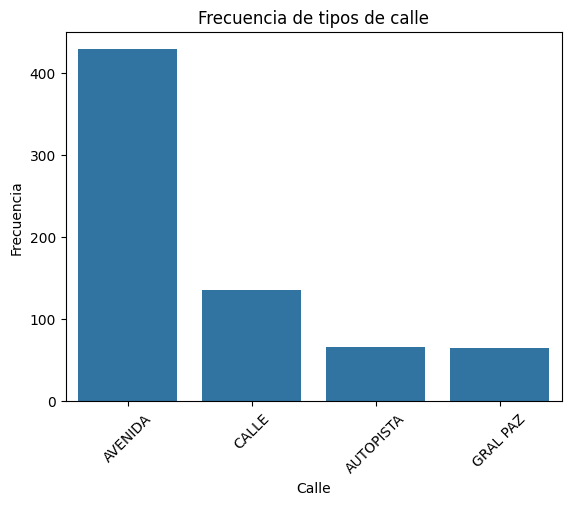

In [100]:
# Crear un gráfico de barras vertical
sns.barplot(x=df_hechos['TIPO_DE_CALLE'].value_counts().index, y=df_hechos['TIPO_DE_CALLE'].value_counts())
plt.title('Frecuencia de tipos de calle')
plt.xlabel('Calle')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.show()

Se puede ver que en las Avenidas ocurre la mayor cantidad de accidentes.

Se busca saber los valores concretos de la cantidad de accidentes por calle, para corroborar el gráfico.

In [101]:
print(df_hechos['TIPO_DE_CALLE'].value_counts())

TIPO_DE_CALLE
AVENIDA      429
CALLE        136
AUTOPISTA     66
GRAL PAZ      65
Name: count, dtype: int64


Si bien en las calles también ocurren accidentes, no es ni la mitad de lo que ocurre en las avenidas.

Se ve que datos cobntiene la columna 'COMUNA'.

In [102]:
df_hechos['COMUNA'].unique()

array([ 8,  9,  1, 11, 15,  4,  7, 12,  3, 13, 14, 10,  6,  2,  5,  0],
      dtype=int64)

Se buscan los valores exactos de accidentes por comuna, para saber si hay alguna a la cual prestarle mayor atención.

In [103]:
print(df_hechos['COMUNA'].value_counts())

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64


Como se puede ver, el top 3 de las comunas con mas homicidios es la 1,4 y 9.

Se realiza un gráfico de las frecuencias de siniestros viales en las comunas, para analizarlo de forma mas rápida visualmente.

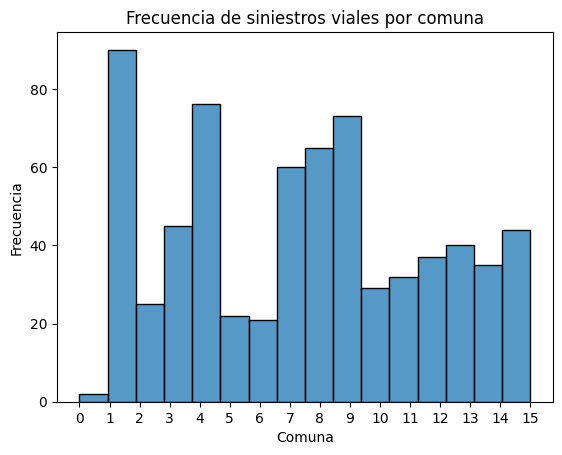

In [105]:
# Crear un histograma
sns.histplot(data=df_hechos['COMUNA'], bins=max(df_hechos['COMUNA']) - min(df_hechos['COMUNA']) + 1, kde=False)
plt.title('Frecuencia de siniestros viales por comuna')
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.xticks(range(min(df_hechos['COMUNA']), max(df_hechos['COMUNA']) + 1))
plt.show()

Las comunas 1, 4 y 9 son las mas afectadas por los siniestros viales. La comuna 1 está integrada por los barrios de Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución. La Comuna 4 está integrada por los barrios de La Boca, Barracas, Parque Patricios y Nueva Pompeya.Y la Comuna 9 está integrada por los barrios de Liniers, Mataderos y Parque Avellaneda.

Se ve que datos cobntiene la columna 'VICTIMA'.

In [106]:
df_hechos['VICTIMA'].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

Se ve que datos cobntiene la columna 'ACUSADO'.

In [107]:
df_hechos['ACUSADO'].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

### Análisis multivariado.

Se realiza un gráfico de frecuencias cruzadas entre 'ACUSDAO' y 'VICTIMA' para ver su relación.

In [108]:
# Crear una tabla de frecuencias cruzadas
relacion_victima_acusado = pd.crosstab(df_hechos['VICTIMA'], df_hechos['ACUSADO'])
print('Tabla de frecuencias cruzadas:\n')
print(relacion_victima_acusado)

Tabla de frecuencias cruzadas:

ACUSADO      AUTO  BICICLETA  CARGAS  MOTO  MULTIPLE  OBJETO FIJO  OTRO  \
VICTIMA                                                                   
AUTO           31          0      14     0         3           21     1   
BICICLETA       8          0      10     0         1            0     1   
CARGAS          1          0       4     0         0            1     0   
MOTO           83          2      78    25         8           40     4   
MOVIL           0          0       1     0         0            0     0   
OBJETO FIJO     1          0       0     0         0            0     0   
PASAJEROS       1          0       0     0         0            0     0   
PEATON         77          5      38    30         5            0     0   
PEATON_MOTO     0          0       0     1         0            0     0   
SD              2          0       1     1         0            0     0   

ACUSADO      PASAJEROS  SD  TREN  
VICTIMA                         

Se realiza un caterplot para poder visualizarlo de forma mas sencilla a la relación entre las variables 'ACSADO' y 'VICTIMA'.

c:\Users\Nahir\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 86.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Nahir\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 66.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Nahir\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 87.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Nahir\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

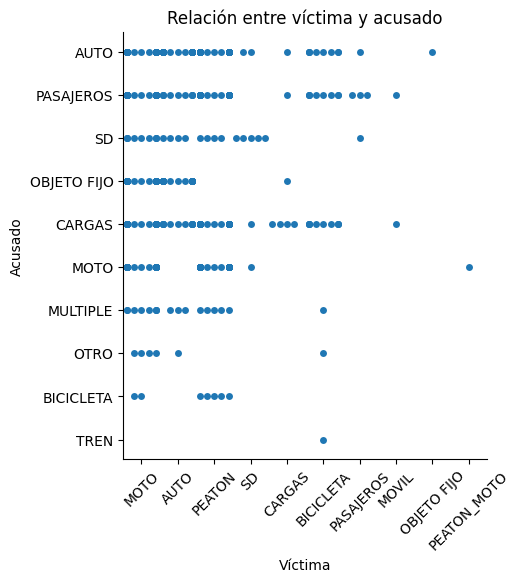

In [109]:
sns.catplot(data=df_hechos,x=df_hechos['VICTIMA'],y=df_hechos['ACUSADO'],kind='swarm')
plt.title('Relación entre víctima y acusado')
plt.xlabel('Víctima')
plt.ylabel('Acusado')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.show()

Como se puede observar, el mayor acusado es el auto, segudio de cargas. Y la mayor victima es moto.

Se crea la columna 'SEMESTRE' para psterior utilización en los KPIs.

In [110]:
df_hechos['SEMESTRE'] = df_hechos['AAAA'].astype(str) + "-"+ df_hechos['MM'].apply(lambda x: 1 if x <= 6 else 2).astype(str)
df_hechos.head(3)

,ID,N_VICTIMAS,AAAA,MM,HH,TIPO_DE_CALLE,COMUNA,VICTIMA,ACUSADO,SEMESTRE
0,2016-0001,1,2016,1,4.0,AVENIDA,8,MOTO,AUTO,2016-1
1,2016-0002,1,2016,1,1.0,GRAL PAZ,9,AUTO,PASAJEROS,2016-1
2,2016-0003,1,2016,1,7.0,AVENIDA,1,MOTO,AUTO,2016-1


Se guarda el df limpio en formato CSV.

In [111]:
df_hechos.to_csv('Hechos.csv')